# Use Salary to Predict User Purchase From Social Media Ad

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

## Data Analysis of Estimated Salary Feature

In [12]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data)

print('----------------------------------------------------------')

#Data about EstimatedSalary Column
print(data['EstimatedSalary'].describe())

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
----------------------------------------------------------
count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64


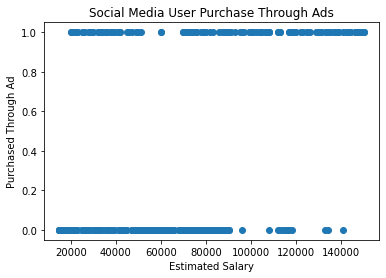

In [13]:
plt.scatter(data['EstimatedSalary'], data['Purchased'])
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased Through Ad')
plt.title('Social Media User Purchase Through Ads')
plt.show()

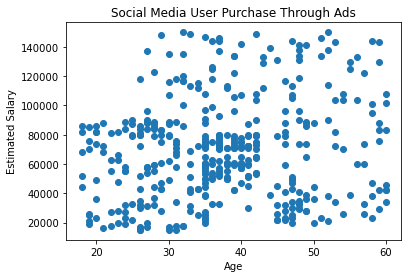

In [14]:
plt.scatter(data['Age'], data['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Social Media User Purchase Through Ads')
plt.show()

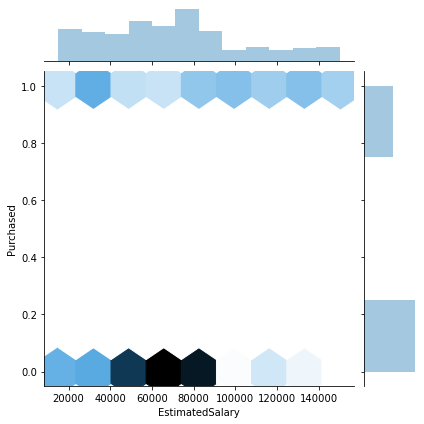

In [15]:
sns.jointplot(data = data, x = data['EstimatedSalary'], y = data['Purchased'], kind = 'hex')

In [16]:
#Split data 
X_training_salary, X_testing_salary, y_training_salary, y_testing_salary = train_test_split(data['EstimatedSalary'], data['Purchased'], test_size = 0.15, random_state = 0)

## Perceptron Model for Estimated Salary

Accuracy of Perceptron Model: 0.25


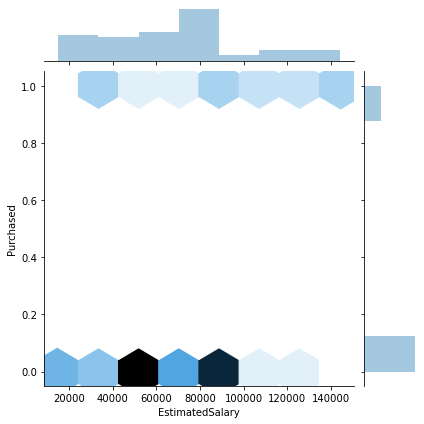

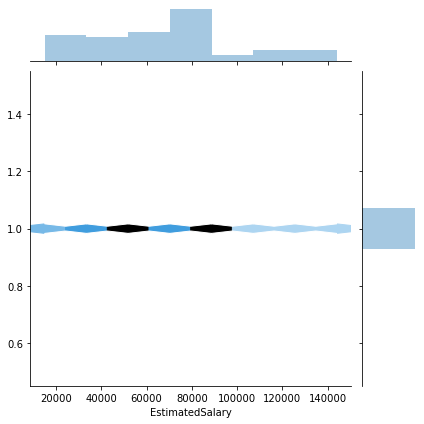

In [17]:
perceptron_classifier_salary = Perceptron(random_state = 0)
perceptron_classifier_salary.fit(X_training_salary.values.reshape(-1, 1), y_training_salary)
perceptron_prediction_salary = perceptron_classifier_salary.predict(X_testing_salary.values.reshape(-1, 1))

sns.jointplot(x = X_testing_salary, y = y_testing_salary, data = data, kind = 'hex')
sns.jointplot(x = X_testing_salary, y = perceptron_prediction_salary, data = data, kind = 'hex')

print('Accuracy of Perceptron Model: {}'.format(accuracy_score(y_testing_salary, perceptron_prediction_salary)))

## Logistic Regression for Estimated Salary

Accuracy of Logistic Regression Model: 0.75


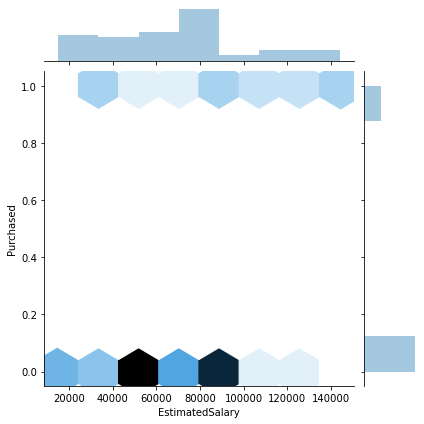

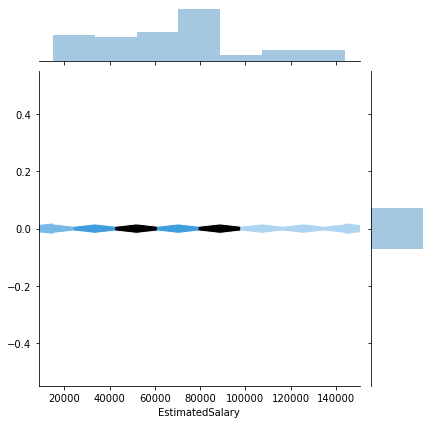

In [18]:
log_reg_salary = LogisticRegression(solver = 'liblinear', random_state = 0, max_iter = 200)

log_reg_salary.fit(X_training_salary.values.reshape(-1, 1), y_training_salary)
lr_prediction_salary = log_reg_salary.predict(X_testing_salary.values.reshape(-1,1))

sns.jointplot(x = X_testing_salary, y = y_testing_salary, data = data, kind = 'hex')
sns.jointplot(x = X_testing_salary, y = lr_prediction_salary, data = data, kind = 'hex')

print('Accuracy of Logistic Regression Model: {}'.format(accuracy_score(y_testing_salary, lr_prediction_salary)))

## SVM Model for Estimated Salary

Accuracy of SVM Model: 0.8333333333333334


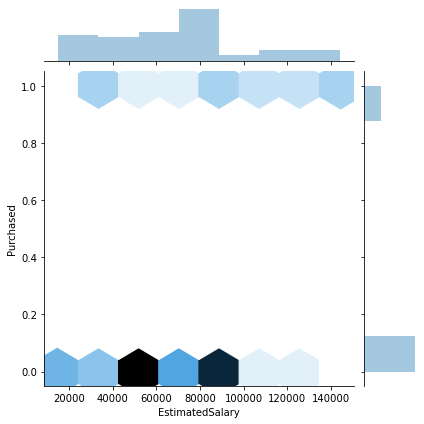

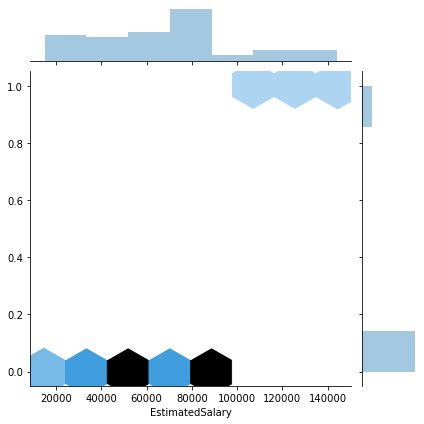

In [19]:
svm_classifier_salary = SVC(kernel = 'linear', random_state = 0)

svm_classifier_salary.fit(X_training_salary.values.reshape(-1, 1), y_training_salary)
svm_prediction_salary = svm_classifier_salary.predict(X_testing_salary.values.reshape(-1, 1))

sns.jointplot(x = X_testing_salary, y = y_testing_salary, data = data, kind = 'hex')
sns.jointplot(x = X_testing_salary, y = svm_prediction_salary, data = data, kind = 'hex')

print('Accuracy of SVM Model: {}'.format(accuracy_score(y_testing_salary, svm_prediction_salary)))

## Decision Tree for Estimated Salary

Accuracy of Decision Tree Model: 0.7166666666666667


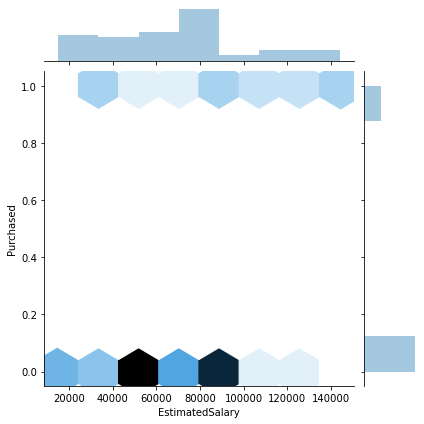

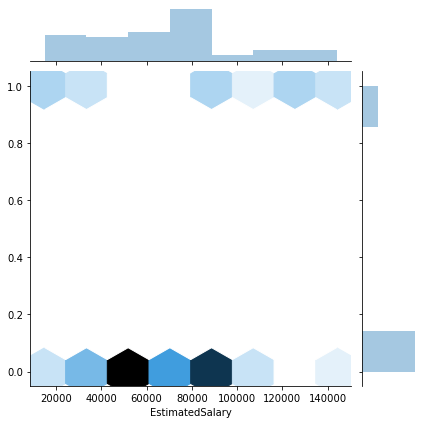

In [20]:
dt_classifier_salary = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

dt_classifier_salary.fit(X_training_salary.values.reshape(-1, 1), y_training_salary)
dt_prediction_salary = dt_classifier_salary.predict(X_testing_salary.values.reshape(-1, 1))

#Decision tree nodes were too small to visualize even with resizing

sns.jointplot(x = X_testing_salary, y = y_testing_salary, data = data, kind = 'hex')
sns.jointplot(x = X_testing_salary, y = dt_prediction_salary, data = data, kind = 'hex')

print('Accuracy of Decision Tree Model: {}'.format(accuracy_score(y_testing_salary, dt_prediction_salary)))